<div align="center"> 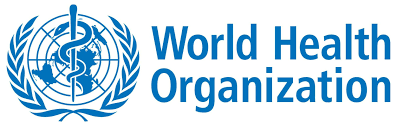

###### Importing Libraries

In [1]:
## Importing Librarires

 # For working with data
import pandas as pd
import numpy as np

 # For Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

 # For Train Test Split
from sklearn.model_selection import train_test_split

 # For Linear Regression Model and Metrics
import statsmodels.api as sm
import statsmodels.tools

 # Regex
import re

 # For Testing
import unittest
from unittest.mock import patch  ## to deal with functions where we ask user for input

## **1** Function

In [ ]:
def predict_life_expectancy():
    ##Notes
     # Order for new_data , params, and cols must match (order matters!!!)
     # Haven't completed the testing for the code for the region input
     # Had to capitalise 'And' in 'Central America and Caribbean' and 'Of' in 'Rest of Europe'
     # Take the inputs outside of the consent if and use try and except -- to make things less messy?????
    
    ############################################################################################################
    ## Asking for consent
    consent = input("Do you consent to using advanced population data, \
                    which may include protected information, \
                    for better accuracy? (Y/N):" ).upper()
    assert( consent == 'Y' or consent == 'N'), "Please make sure your input is Y or N."
    
    ###########################################################################################################
    ## Getting the Data from user
    
    
    ### Ethical Version ###
    if consent == 'N':
        # The columns for the ethical model (###CAPATILSE AND and OF for REGIONS)
        cols = ['GDP_per_capita', 'region_Central America And Caribbean',
       'region_Middle East', 'region_South America', 'region_Asia',
       'Economy_status_Developing', 'region_Rest Of Europe', 'region_Oceania',
       'region_European Union', 'region_North America', 'Population_mln']
        
        # The coefficcients for our model
        params = []
        
    ### Normal Version ###
    elif consent == 'Y':
        # The columns for the normal model
        cols = ['region_Central America and Caribbean', 'region_South America',
       'Under_five_deaths', 'GDP_per_capita', 'region_Oceania',
       'region_European Union', 'Schooling', 'Incidents_HIV', 'const']
        
        # The coefficcients for our model
        params = []
        
    ### Something went wrong  ###      
    else:
        print('Something went wrong with your consent')
        
    ##########################################################################################################       
        
    # This is the list where we will store the new data from which we will make a prediction 
    new_data = [0]*(len(cols) + 1)  ## + 1 for constant
    new_data[0] = 1   ## changes first value of list to 1  (will later multiply this by y-intercept)
        
    ######## Asking user for the new data ###################################################################
    ##### GDP#######
    gdp = float(input('What is the GDP per capita for your country? : '))
    gdp = gdp/1000
    gdp_index = [cols.index(x) for x in cols \
                if re.match(r'GDP_([A-Za-z\s]+)', x)][0] ## should only return list of length 1 
                                                            ## -- then extract that value using [0]
    ## update the list
    new_data[gdp_index] = gdp
    
    
    ##### Region#######  
    ## Creates list of all regions in our modelwithout the 'region_'
    regions = [re.match(r'region_([A-Za-z\s]+)', x).group(1) for x in cols \
                if re.match(r'region_([A-Za-z\s]+)', x)] 
    ## Creates list of the indexes of these regions in our original list: cols
    region_index = [cols.index(x) for x in cols \
                   if re.match(r'region_([A-Za-z\s]+)', x)] 
    ## User input 
    print(regions)
    r = input('Please type in your region if listed above, other wise type \'None\': ').title()
        
    ## Takes input and converts to 1 if in list of cols
    ## Then add that to our new  data list
    if r in regions:
        x=regions.index(r)
        new_data[region_index[x] +1] = 1
    elif r not in regions:
        pass
    else:
        print('Something went wrong with your Region input')  ## use try instead of ifs and raise exception here??
        #
               
    
    ###########################################################################################################
    ## Predicting!!! ... finally... 
    
     # from above we have 
        # new_data = [1, inputs from user (modified for modelling)(in the correct order!!!)
        # params = [y-intercept , coefficients(in the correct order!!!)]
        
     # Multiply each corresponding element from each list 
     # Then take the sum
     # i.e. y = c + b_0x_0 + b_1x_1 + ....
    final_prediction = sum([coef * data_point for coef, data_point in zip(params, new_data)])

    return final_prediction


## **2** Testing

### **2.1** Testing Actual Function

### **2.2** Testing Parts of Function

#### Consent

In [3]:
## Asking for consent
def consent():
    consent = input("Do you consent to using advanced population data, \
                    which may include protected information, \
                    for better accuracy? (Y/N):" ).upper()
    assert( consent == 'Y' or consent == 'N'), "Please make sure your input is Y or N."
    return consent

In [5]:
class TestConsentFunction(unittest.TestCase):
    @patch('builtins.input', return_value='Y')    #@patch('builtins.input', return_value = 'user input')
    def test_Y(self, mock_input):
        self.assertEqual(consent(), 'Y')

    @patch('builtins.input', return_value='N')
    def test_N(self, mock_input):
        self.assertEqual(consent(), 'N')

    @patch('builtins.input', return_value='y')
    def test_y(self, mock_input):
        self.assertEqual(consent(), 'Y')

    @patch('builtins.input', return_value='n')
    def test_n(self, mock_input):
        self.assertEqual(consent(), 'N')

    @patch('builtins.input', return_value='invalid')
    def test_invalid(self, mock_input):
        with self.assertRaises(AssertionError):
            consent()
            
    @patch('builtins.input', return_value= '1234')
    def test_1234(self, mock_input):
        with self.assertRaises(AssertionError):
            consent()


In [7]:
# Create a test loader and suite
loader = unittest.TestLoader()
suite_consent = loader.loadTestsFromTestCase(TestConsentFunction)

# Run the test suite
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite_consent)

test_1234 (__main__.TestConsentFunction.test_1234) ... ok
test_N (__main__.TestConsentFunction.test_N) ... ok
test_Y (__main__.TestConsentFunction.test_Y) ... ok
test_invalid (__main__.TestConsentFunction.test_invalid) ... ok
test_n (__main__.TestConsentFunction.test_n) ... ok
test_y (__main__.TestConsentFunction.test_y) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.026s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

#### Regions

##### First Try

In [ ]:
#    ## Are you in Europe? The Union or Outside?
#         if r = Europe:
#             union = input('Are you part of the European Union? (Y/N)').upper()
#             assert( union == 'Y' or union == 'N'), "Please make sure your input is Y or N." 
            
#             if union = 'Y':
#                 r = 'European Union'
#             ##

#         lst = [0,0,0,0]
#         if r in regions:
#             index = regions.index(r)
#             lst[index] = 1
#         else:
#             pass

In [ ]:
# def region():
#     regions = [ 'Central America And Caribbean', 'Middle East', 'South America', 'Asia'] # the regions we're interested in
#     r = input('What region is your country in?: ').title()

#     lst = [0,0,0,0]
#     if r in regions:
#         index = regions.index(r)
#         lst[index] = 1
#     else:
#         pass
    
#     return lst

In [ ]:
# class TestRegionFunction(unittest.TestCase):
   
#     @patch('builtins.input')
#     def test_correct_capitalised(self, mock_input):
#         # Test for 'Central America And Caribbean'
#         mock_input.return_value = 'Central America And Caribbean'
#         self.assertEqual(region(), [1,0,0,0])

#         # Test for 'Middle East'
#         mock_input.return_value = 'Middle East'
#         self.assertEqual(region(), [0,1,0,0])
        
#         # Test for 'South America'
#         mock_input.return_value = 'South America'
#         self.assertEqual(region(), [0,0,1,0])
        
#         # Test for 'Asia'
#         mock_input.return_value = 'Asia'
#         self.assertEqual(region(), [0,0,0,1])
        
#     @patch('builtins.input')
#     def test_correct_not_capitalised(self, mock_input):
#         # Test for 'Central America And Caribbean'
#         mock_input.return_value = 'central america and caribbean'
#         self.assertEqual(region(), [1,0,0,0])

#         # Test for 'Middle East'
#         mock_input.return_value = 'middle East'
#         self.assertEqual(region(), [0,1,0,0])
        
#         # Test for 'South America'
#         mock_input.return_value = 'SouTH AmeriCA'
#         self.assertEqual(region(), [0,0,1,0])
        
#         # Test for 'Asia'
#         mock_input.return_value = 'ASIA'
#         self.assertEqual(region(), [0,0,0,1])

#     @patch('builtins.input')
#     def test_incorrect(self, mock_input):
#         # Test for 'Central America And Caribbean'
#         mock_input.return_value = 'africa'
#         self.assertEqual(region(), [0,0,0,0])

#         # Test for 'Middle East'
#         mock_input.return_value = 'la la land'
#         self.assertEqual(region(), [0,0,0,0])
        
#         # Test for 'South America'
#         mock_input.return_value = '5321'
#         self.assertEqual(region(), [0,0,0,0])
        
#         # Test for 'Asia'
#         mock_input.return_value = 'Caribbean'
#         self.assertEqual(region(), [0,0,0,0])


In [ ]:
# # Create a test loader and suite
# loader = unittest.TestLoader()
# suite_region = loader.loadTestsFromTestCase(TestRegionFunction)

# # Run the test suite
# runner = unittest.TextTestRunner(verbosity=2)
# runner.run(suite_region)

##### Second Try (Regex)

###### Creating list of region

In [9]:
cols = ['GDP_per_capita', 'region_Central America And Caribbean',
       'region_Middle East', 'region_South America', 'region_Asia',
       'Economy_status_Developing', 'region_Rest Of Europe', 'region_Oceania',
       'region_European Union', 'region_North America', 'Population_mln']

# Creates list of all regions without the 'region_'
regions = [re.match(r'region_([A-Za-z\s]+)', x).group(1) for x in cols\
           if re.match(r'region_([A-Za-z\s]+)', x)]

## Creates list of the indexes of these regions in our original list: cols
region_index = [cols.index(x) for x in cols \
                if re.match(r'region_([A-Za-z\s]+)', x)] 
print(regions)
print(region_index)

['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
[1, 2, 3, 4, 6, 7, 8, 9]


###### Region input from user

In [11]:
len(cols)


11

In [31]:
def region_2(lst_of_regions, lst_of_region_indexes):
    regions = lst_of_regions ## renamed list
    region_index = lst_of_region_indexes ## renamed list
    print(regions)
    new_data = [0]*12  ## + 1 for constant
    new_data[0] = 1 
    r = input('Please type in your region if listed above, other wise type \'None\': ').title()
    if r in regions:
        x=regions.index(r)
        new_data[region_index[x] +1] = 1
    elif r not in regions:
        pass
    else:
        print('Something went wrong with your Region input')  ## use try instead of ifs and raise exception here??
    return new_data

In [21]:
region_2(regions, region_index)

['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']


Please type in your region if listed above, other wise type 'None':  NOrth America


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [33]:
class TestRegion_2Function(unittest.TestCase):
   
    @patch('builtins.input')
    def test_correct_capitalised(self, mock_input):
        # Test for 'Central America And Caribbean'
        mock_input.return_value = 'Central America And Caribbean'
        self.assertEqual(region_2(regions,region_index), [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

        # Test for 'Middle East'
        mock_input.return_value = 'Middle East'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
        
        # Test for 'South America'
        mock_input.return_value = 'South America'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
        
        # Test for 'Asia'
        mock_input.return_value = 'Asia'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

        # Test for 'Rest Of Europe'
        mock_input.return_value = 'Rest Of Europe'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

        # Test for 'Oceania'
        mock_input.return_value = 'Oceania'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

       #Test for 'European Union'
        mock_input.return_value = 'European Union'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

       #Test for 'North America'
        mock_input.return_value = 'North America'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
        
    @patch('builtins.input')
    def test_correct_not_capitalised(self, mock_input):
        # Test for 'central america and caribbean'
        mock_input.return_value = 'central america and caribbean'
        self.assertEqual(region_2(regions,region_index), [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

        # Test for 'norTH amErica'
        mock_input.return_value = 'norTH amErica'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
        
        # Test for 'rEst of EuropE'
        mock_input.return_value = 'rEst of EuropE'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
        
        # Test for 'Asia'
        mock_input.return_value = 'ASIA'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

    @patch('builtins.input')
    def test_incorrect(self, mock_input):
        # Test for 'africa'
        mock_input.return_value = 'africa'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

        # Test for 'la la land'
        mock_input.return_value = 'la la land'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        
        # Test for '5321'
        mock_input.return_value = '5321'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        
        # Test for 'Caribbean'
        mock_input.return_value = 'Caribbean'
        self.assertEqual(region_2(regions,region_index), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [35]:
# Create a test loader and suite
loader = unittest.TestLoader()
suite_region_2 = loader.loadTestsFromTestCase(TestRegion_2Function)

# Run the test suite
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite_region_2)

test_correct_capitalised (__main__.TestRegion_2Function.test_correct_capitalised) ... ok
test_correct_not_capitalised (__main__.TestRegion_2Function.test_correct_not_capitalised) ... ok
test_incorrect (__main__.TestRegion_2Function.test_incorrect) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.013s

OK


['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
['Central America And Caribbean', 'Middle East', 'South America', 'Asia', 'Rest Of Europe', 'Oceania', 'European Union', 'North America']
['Central America And Caribbean', 

<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### Runs all Tests

In [ ]:
## Runs all tests
if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)